<a href="https://colab.research.google.com/github/13194307/UTS_ML2019_ID13194307/blob/master/ML_A2_PracticalProject/dataExploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot

In [0]:
# Imports dataset from github repo

url = r"https://raw.githubusercontent.com/13194307/UTS_ML2019_ID13194307/master/ML_A2_PracticalProject/train.csv"
dataset = pd.read_csv(url)

In [36]:
# Drops OutcomeSubtype since this attribute does not exist in test dataset and
# we only want to predict OutcomeType

dataset = dataset.drop(["OutcomeSubtype"], axis=1)
dataset.head()

,AnimalID,Name,DateTime,OutcomeType,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,12-02-14 18:22,Return_to_owner,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A656520,Emily,13-10-13 12:44,Euthanasia,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,A686464,Pearce,31-01-15 12:28,Adoption,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,A683430,NaN,11-07-14 19:09,Transfer,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,A667013,NaN,15-11-13 12:52,Transfer,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan


In [42]:
dataset.describe()

,AnimalID,Name,DateTime,OutcomeType,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
count,26729,19038,26729,26729,26729,26728,26711,26729,26729
unique,26729,6374,22918,5,2,5,44,1380,366
top,A447896,Max,11-08-15 0:00,Adoption,Dog,Neutered Male,1 year,Domestic Shorthair Mix,Black/White
freq,1,136,19,10769,15595,9779,3969,8810,2824


In [116]:
dataset["OutcomeType"].value_counts()

Adoption           10769
Transfer            9422
Return_to_owner     4786
Euthanasia          1555
Died                 197
Name: OutcomeType, dtype: int64

In [134]:
dataset["OutcomeType"] = dataset["OutcomeType"].replace("Return_to_owner", "Return")
dataset.head()

,AnimalID,Name,DateTime,OutcomeType,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,AgeInDays
0,A671945,Hambone,12-02-14 18:22,Return,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White,365
1,A656520,Emily,13-10-13 12:44,Euthanasia,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby,365
2,A686464,Pearce,31-01-15 12:28,Adoption,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White,730
3,A683430,NaN,11-07-14 19:09,Transfer,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream,21
4,A667013,NaN,15-11-13 12:52,Transfer,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan,730


In [78]:
# Checking if all non-NaN values consist of no more than two words: a number 
# followed by "day", "week", "month" or "year"

age = dataset["AgeuponOutcome"].dropna().str.split(" ")
count = age.apply(len)
count.value_counts()

2    26711
Name: AgeuponOutcome, dtype: int64

In [0]:
# Converts age column to an integer representing its age in days. For
# simplicity, a month is always assumed to be 30 days

def ageToDays(x):
    if type(x) == float:
        return -1
    else:
        x_split = x.split(" ")
        intComp = int(x_split[0])
        #print(str(intComp) + str("month" in x_split[1]))
        
        if "day" in x_split[1]:
            return intComp
        elif "week" in x_split[1]:
            return intComp * 7
        elif "month" in x_split[1]:
            return intComp * 30
        elif "year" in x_split[1]:
            return intComp * 365

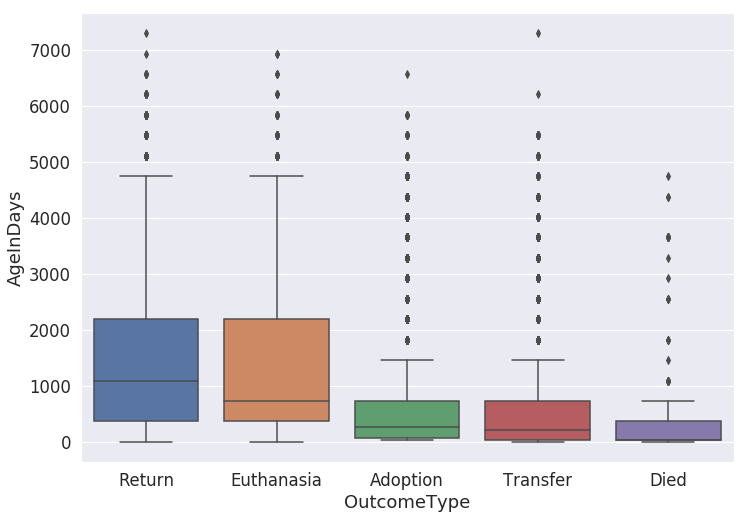

In [130]:
# Creates new AgeInDays column
age = dataset["AgeuponOutcome"]
dataset["AgeInDays"] = age.apply(ageToDays)

a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.boxplot(ax=ax, x = "OutcomeType", y = "AgeInDays", data=dataset)

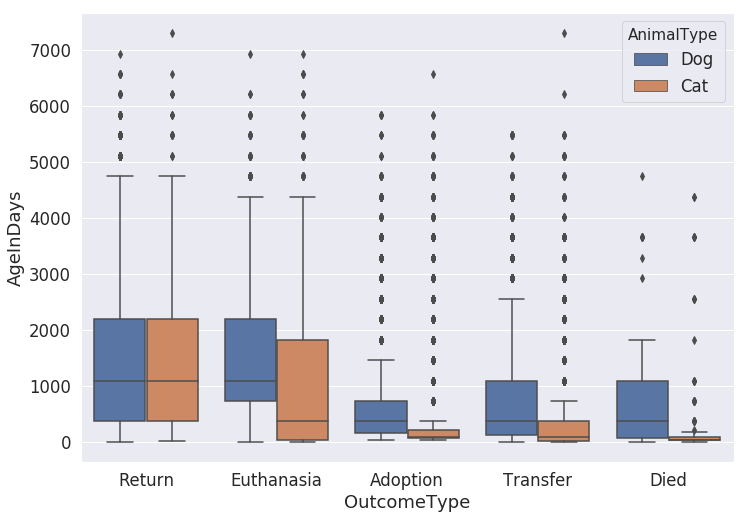

In [133]:
a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.boxplot(ax=ax, x = "OutcomeType", y = "AgeInDays", hue="AnimalType", data=dataset)

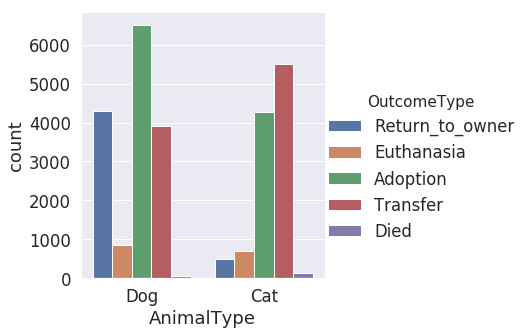

In [39]:
sns.catplot(x="AnimalType", kind="count", hue="OutcomeType", data=dataset)